In [1]:
!pip list

Package                      Version
---------------------------- -----------
absl-py                      2.1.0
anyio                        4.6.2
argon2-cffi                  21.3.0
argon2-cffi-bindings         21.2.0
asttokens                    2.0.5
astunparse                   1.6.3
async-lru                    2.0.4
attrs                        24.2.0
Babel                        2.11.0
backcall                     0.2.0
beautifulsoup4               4.12.3
bleach                       6.2.0
Brotli                       1.0.9
cachetools                   5.5.0
certifi                      2024.8.30
cffi                         1.17.1
charset-normalizer           3.3.2
colorama                     0.4.6
comm                         0.2.1
contourpy                    1.3.0
cycler                       0.12.1
debugpy                      1.6.7
decorator                    5.1.1
defusedxml                   0.7.1
exceptiongroup               1.2.0
executing                    0.8.3
f

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print("Num GPUs Available: ", len(physical_devices))

Num GPUs Available:  1


In [4]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

Example training images and their labels: [6, 9, 9, 4, 1, 1, 2, 7, 8, 3]
Corresponding classes for the labels: ['frog', 'truck', 'truck', 'deer', 'automobile', 'automobile', 'bird', 'horse', 'ship', 'cat']


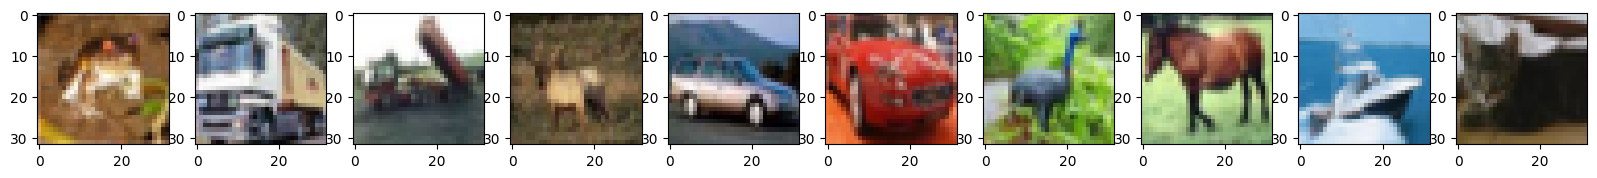

In [5]:
cifar10_classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
print('Example training images and their labels: ' + str([x[0] for x in y_train[0:10]])) 
print('Corresponding classes for the labels: ' + str([cifar10_classes[x[0]] for x in y_train[0:10]]))

fig, axarr = plt.subplots(1, 10)
fig.set_size_inches(20, 6)

for i in range(10):
    image = x_train[i]
    axarr[i].imshow(image)
plt.show()

In [6]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [7]:
import numpy as np
from tensorflow.keras.utils import to_categorical

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [9]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 2304)              0         
                                                                 
 dense (Dense)               (None, 512)               1

In [11]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [12]:
history = model.fit(x_train, y_train, batch_size=64, epochs=15, validation_data=(x_test, y_test))

Epoch 1/15
782/782 [==============================] - 17s 13ms/step - loss: 1.4869 - accuracy: 0.4622 - val_loss: 1.1782 - val_accuracy: 0.5857
Epoch 2/15
782/782 [==============================] - 10s 13ms/step - loss: 1.1302 - accuracy: 0.6014 - val_loss: 1.0024 - val_accuracy: 0.6511
Epoch 3/15
782/782 [==============================] - 10s 13ms/step - loss: 0.9899 - accuracy: 0.6531 - val_loss: 0.9512 - val_accuracy: 0.6631
Epoch 4/15
782/782 [==============================] - 10s 13ms/step - loss: 0.8902 - accuracy: 0.6895 - val_loss: 0.8632 - val_accuracy: 0.6985
Epoch 5/15
782/782 [==============================] - 10s 13ms/step - loss: 0.8141 - accuracy: 0.7169 - val_loss: 0.8882 - val_accuracy: 0.6975
Epoch 6/15
782/782 [==============================] - 10s 13ms/step - loss: 0.7447 - accuracy: 0.7404 - val_loss: 0.8305 - val_accuracy: 0.7144
Epoch 7/15
782/782 [==============================] - 10s 13ms/step - loss: 0.6868 - accuracy: 0.7566 - val_loss: 0.8377 - val_accuracy:

In [13]:
def plotLosses(history):  
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper right')
    plt.show()

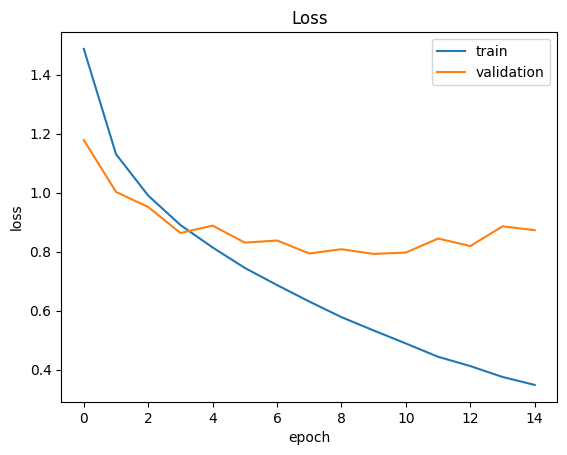

In [14]:
plotLosses(history)

In [15]:
def plotAccuracy(history):  
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

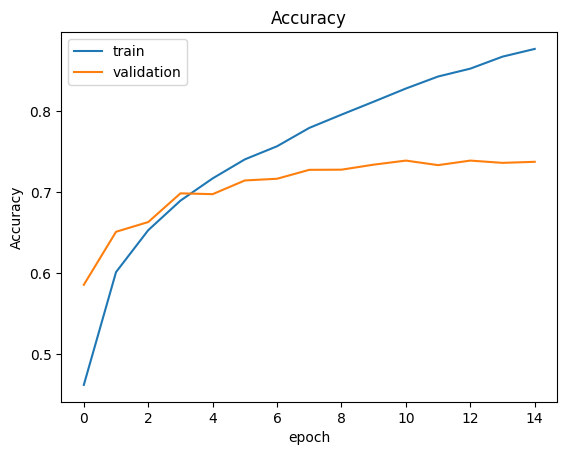

In [16]:
plotAccuracy(history)

In [17]:
import os
from keras.models import load_model
model.save(os.path.join('models','Cifar_10.h5'))

In [18]:
model = tf.keras.models.load_model('models\Cifar_10.h5')

In [19]:
import numpy as np
x_test_sample = np.expand_dims(x_test[20], axis=0)
model.predict(x_test_sample)

1/1 [==============================] - 0s 321ms/step


array([[1.8501509e-04, 9.6892387e-09, 7.5135485e-04, 8.4597705e-04,
        2.5747943e-04, 4.0429414e-04, 3.4049442e-08, 9.9754590e-01,
        1.4906164e-09, 9.9978442e-06]], dtype=float32)

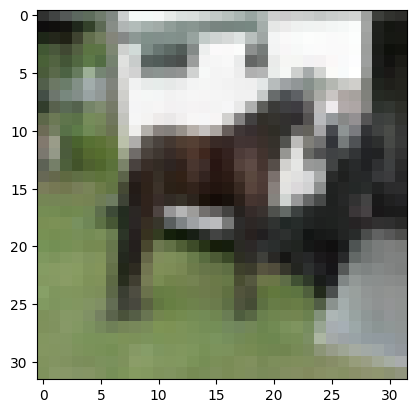

In [20]:
plt.imshow(x_test[20])

In [21]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'] 

# Get the prediction probabilities
predictions = model.predict(x_test_sample)

# Get the index of the class with the highest probability
predicted_class_index = np.argmax(predictions)

# Get the corresponding class name
predicted_class_name = class_names[predicted_class_index]

print(f"The predicted class is: {predicted_class_name}")

1/1 [==============================] - 0s 31ms/step
The predicted class is: horse
